<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
rng = np.random.default_rng()

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    return np.sum(np.inner(X, V)[:, :, :1], axis=0)

print(sum_prod(np.array([[[1, 0], [0, 1]], [[1, 1], [1, 1]]]), np.array([[2, 3], [2, 3]])))

[[7]
 [8]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    # Your code goes here
    return M > threshold

print(binarize(np.array([[0.7, 0.4], [0.1, 0.8]])))

[[ True False]
 [False  True]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def to_python_nums(s):
    return list(map(int, s))

def unique_rows(mat):
    return list(map(to_python_nums, np.apply_along_axis(set, 1, mat)))

def unique_columns(mat):
    return list(map(to_python_nums, np.apply_along_axis(set, 0, mat)))

print(unique_rows(np.array([[1, 2, 3], [1, 1, 2], [3, 5, 3]])))
print(unique_columns(np.array([[1, 2, 3], [1, 1, 2], [3, 5, 3]])))

[[1, 2, 3], [1, 2], [3, 5]]
[[1, 3], [1, 2, 5], [2, 3]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [15]:
def generate_gaussian(m, n):
    return rng.standard_normal((n, m)) * 8589934591 * rng.random()

In [21]:
def expected_value_cols(mat):
    return np.mean(mat, axis=0)

def expected_value_rows(mat):
    return np.mean(mat, axis=1)

def variance_cols(mat):
    return np.var(mat, axis=0)

def variance_rows(mat):
    return np.var(mat, axis=1)

def hist_every_row_and_column(mat): # I'm sure this is not what was desired, but it tries to follow the specified task (the way it was specified anyway)
    for i in range(mat.shape[0]):
        plt.hist(mat[i])
    mat2 = np.reshape(mat, mat.shape, order="F")
    for i in range(mat2.shape[0]):
        plt.hist(mat2[i])

[ 6.88180601e+08 -1.84482268e+09  2.92451463e+07 -7.75625719e+08
  3.25159879e+08  4.40134504e+08 -8.26982707e+08 -9.96406809e+08
  1.24608062e+09 -1.19872364e+08] [-1.09898803e+09  7.63242730e+08  6.94054401e+08 -8.70008473e+08
  4.99194401e+08  1.24160852e+06 -1.23061965e+09 -4.49008188e+08
  3.94726354e+07] [3.52912464e+18 5.46452598e+18 4.64002220e+18 3.97744973e+18
 3.01315029e+18 1.26963433e+18 1.96379589e+18 2.86922249e+18
 6.20065803e+18 4.29594765e+18] [5.97127936e+18 3.26237544e+18 8.90320616e+17 4.70569386e+18
 1.28968104e+18 4.14095398e+18 3.98798957e+18 3.61711103e+18
 7.86045193e+18]


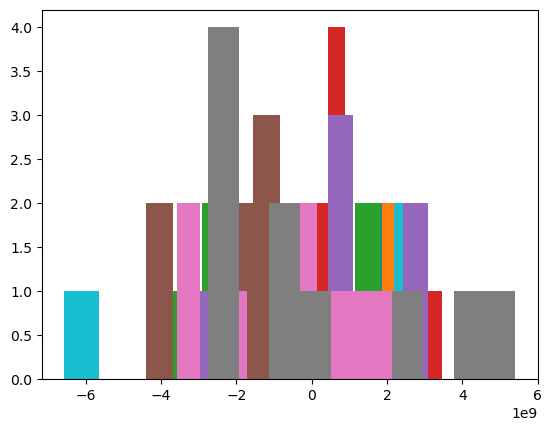

In [22]:
mat = generate_gaussian(10, 9)
print(expected_value_cols(mat), expected_value_rows(mat), variance_cols(mat), variance_rows(mat))
hist_every_row_and_column(mat)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    if n % 2 != m % 2:
        return np.tile(np.array([a, b]), (n * m // 2)).reshape(m, n, order="C" if m % 2 == 0 else "F")
    if n % 2 != 0 and m % 2 != 0:
        return np.append(np.tile(np.array([a, b]), (n * m // 2)), a).reshape(m, n)
    return np.tile([np.tile(np.array([a, b]), n // 2), np.tile(np.array([b, a]), n // 2)], (m // 2, 1))

print(chess(8, 8, 0, 1), end="\n\n")
print(chess(7, 8, 0, 1), end="\n\n")
print(chess(8, 7, 0, 1), end="\n\n")
print(chess(7, 7, 0, 1), end="\n\n")

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]

[[0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]]

[[0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0]]



<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [7]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((b, a, 3), background_color)
    for j in range(b // 2 - n // 2, b // 2 + (n + 1) // 2):
        for i in range(a // 2 - m // 2, a // 2 + (m + 1) // 2):
            img[j, i] = rectangle_color
    plt.imshow(img)

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((b, a, 3), background_color)
    for j in range(b // 2 - n, b // 2 + n + 1):
        xmax = math.floor(math.sqrt((1 - (b // 2 - j) ** 2 / (n * n)) * m * m))
        for i in range(a // 2 - xmax, a // 2 + (xmax + 1)):
            img[j, i] = ellipse_color
    plt.imshow(img)

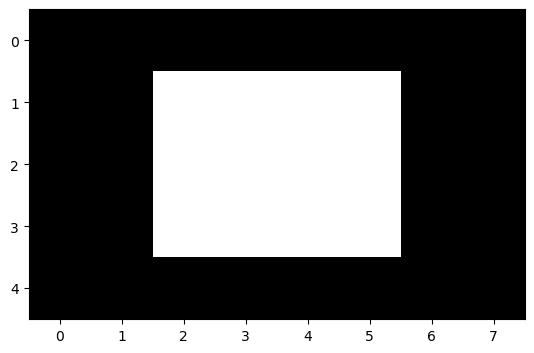

In [8]:
draw_rectangle(8, 5, 4, 3, (255, 255, 255), (0, 0, 0))

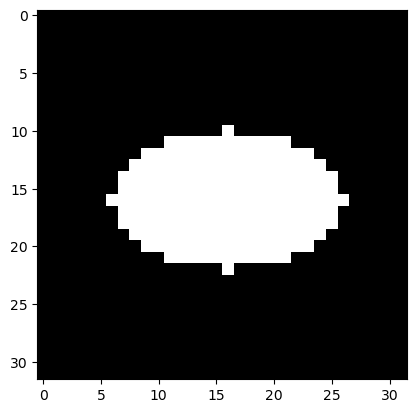

In [9]:
draw_ellipse(32, 32, 10, 6, (255, 255, 255), (0, 0, 0))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [8]:
def analyze1(arr):
    result = np.zeros(3)
    result[0] = np.mean(arr)
    result[1] = np.var(arr)
    result[2] = np.sqrt(result[1])
    return result

def localminmax(arr):
    maxes = arr[np.insert(arr[1:] > arr[:-1], 0, True) & np.append(arr[:-1] > arr[1:], True)]
    mins  = arr[np.insert(arr[1:] < arr[:-1], 0, True) & np.append(arr[:-1] < arr[1:], True)]
    return mins, maxes

def slipping_avg(arr, p):
    return np.convolve(arr, np.full(p, 1/p), 'valid')

testarray = np.array([-10, 0, 10, 5, 8])
print(analyze1(testarray))
print(localminmax(testarray))
print(slipping_avg(testarray, 3))

[ 2.6        51.04        7.14422844]
(array([-10,   5]), array([10,  8]))
[0.         5.         7.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
def one_hot(vec):
    result = np.full((np.shape(vec)[0], np.max(vec) + 1), 0)
    for i, it in enumerate(vec):
        result[i][it] = 1
    return result

print(one_hot(np.array([0, 2, 3, 0])))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
